#### Import 

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
import warnings
warnings.filterwarnings("ignore")

In [112]:
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.nonparametric.kde import KDEUnivariate
import plotly.figure_factory as ff

In [113]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import data

In [114]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [115]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,C4M_Flag,C5M_Close public transport,C5M_Flag,C6M_Stay at home requirements,C6M_Flag,C7M_Restrictions on internal movement,C7M_Flag,C8EV_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6M_Facial Coverings,H6M_Flag,H7_Vaccination policy,H7_Flag,H8M_Protection of elderly people,H8M_Flag,V1_Vaccine Prioritisation (summary),V2A_Vaccine Availability (summary),V2B_Vaccine age eligibility/availability age floor (general population summary),V2C_Vaccine age eligibility/availability age floor (at risk summary),V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


##### View the output of df.head() in a tabular format.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryCode' is dropped to avoid redundancy.



In [117]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Converting 'Date' to datetime.

In [118]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [119]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [120]:
# Select columns by data type, excluding datetime columns
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

# Applying value_counts to display the unique_values and their frequency.
values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': CountryCode
 ABW    1096
 PAK    1096
 NAM    1096
 NER    1096
 NGA    1096
        ... 
 GMB    1096
 GRC    1096
 GRL    1096
 GTM    1096
 ZWE    1096
 Name: count, Length: 185, dtype: int64,
 'Jurisdiction': Jurisdiction
 NAT_TOTAL    202760
 Name: count, dtype: int64,
 'C1M_School closing': C1M_School closing
 0.0    74497
 1.0    55839
 3.0    41246
 2.0    31178
 Name: count, dtype: int64,
 'C1M_Flag': C1M_Flag
 1.0    107134
 NaN     74497
 0.0     21129
 Name: count, dtype: int64,
 'C2M_Workplace closing': C2M_Workplace closing
 0.0    68936
 2.0    64722
 1.0    51824
 3.0    17278
 Name: count, dtype: int64,
 'C2M_Flag': C2M_Flag
 1.0    106742
 NaN     68936
 0.0     27082
 Name: count, dtype: int64,
 'C3M_Cancel public events': C3M_Cancel public events
 2.0    85119
 0.0    64184
 1.0    53457
 Name: count, dtype: int64,
 'C3M_Flag': C3M_Flag
 1.0    119017
 NaN     64184
 0.0     19559
 Name: count, dtype: int64,
 'C4M_Restrictions on gatherings': C4M_Res


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [121]:
df = df.drop(columns=['Jurisdiction'])
print(df.shape)

(202760, 52)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [122]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [123]:
df.dtypes

CountryCode                                                                              category
Date                                                                               datetime64[ns]
C1M_School closing                                                                        float64
C1M_Flag                                                                                  float64
C2M_Workplace closing                                                                     float64
C2M_Flag                                                                                  float64
C3M_Cancel public events                                                                  float64
C3M_Flag                                                                                  float64
C4M_Restrictions on gatherings                                                            float64
C4M_Flag                                                                                  float64
C5M_Close public tra


### Renaming columns

In [124]:

df.columns = [col.split('_')[0] if ' ' in col else col for col in df.columns]
df.head(1)

,CountryCode,Date,C1M,C1M_Flag,C2M,C2M_Flag,C3M,C3M_Flag,C4M,C4M_Flag,C5M,C5M_Flag,C6M,C6M_Flag,C7M,C7M_Flag,C8EV,E1,E1_Flag,E2,E3,E4,H1,H1_Flag,H2,H3,H4,H5,H6M,H6M_Flag,H7,H7_Flag,H8M,H8M_Flag,V1,V2A,V2B,V2C,V2D,V2E_Education,V2F,V2G,V3,V4,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


### Dealing With Missing Values

In [125]:
na_values = df.isna().sum()

In [126]:
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

#### Drop entries where 'ConfirmedCases' and 'ConfirmedDeaths' are NaNs

In [127]:
df_ccd = df

df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
print(df.shape)

(201664, 52)


In [128]:
whichCountry = set(df_ccd['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'TKM'}


##### No data on confirmed cases and deaths for Turkmenistan.

#### Drop 'MajorityVaccinated' and 'PopulationVaccinated'.

In [129]:
#df_vacc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df_vc = df

In [130]:
df = df.dropna(subset=['MajorityVaccinated', 'PopulationVaccinated'])
print(df.shape)

(200568, 52)


In [131]:
df_vc.shape[0] - df.shape[0]

1096

In [132]:
whichCountry = set(df_vc['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'ERI'}


##### Eritrea's vaccination data is missing.

#### Removing duplicates

In [133]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [134]:
df = df.reset_index(drop=True)

In [135]:
print(df.shape)

(200568, 52)


#### We didn't have any duplicate entries in the dataset.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200568 entries, 0 to 200567
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CountryCode                      200568 non-null  category      
 1   Date                             200568 non-null  datetime64[ns]
 2   C1M                              200568 non-null  float64       
 3   C1M_Flag                         126843 non-null  float64       
 4   C2M                              200568 non-null  float64       
 5   C2M_Flag                         132241 non-null  float64       
 6   C3M                              200568 non-null  float64       
 7   C3M_Flag                         136857 non-null  float64       
 8   C4M                              200568 non-null  float64       
 9   C4M_Flag                         124185 non-null  float64       
 10  C5M                              200568 non-

In [137]:
df

,CountryCode,Date,C1M,C1M_Flag,C2M,C2M_Flag,C3M,C3M_Flag,C4M,C4M_Flag,C5M,C5M_Flag,C6M,C6M_Flag,C7M,C7M_Flag,C8EV,E1,E1_Flag,E2,E3,E4,H1,H1_Flag,H2,H3,H4,H5,H6M,H6M_Flag,H7,H7_Flag,H8M,H8M_Flag,V1,V2A,V2B,V2C,V2D,V2E_Education,V2F,V2G,V3,V4,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.00,0.00,0.00,0.00,0.0
1,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.00,0.00,0.00,0.00,0.0
2,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.00,0.00,0.00,0.00,0.0
3,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.00,0.00,0.00,0.00,0.0
4,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NV,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200563,ZWE,2022-12-27,1.0,1.0,2.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,3.0,1.0,5.0,1.0,0.0,NaN,2,3,5-15 yrs,5-15 yrs,2.0,2.0,2.0,2.0,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
200564,ZWE,2022-12-28,1.0,1.0,2.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,3.0,1.0,5.0,1.0,0.0,NaN,2,3,5-15 yrs,5-15 yrs,2.0,2.0,2.0,2.0,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
200565,ZWE,2022-12-29,1.0,1.0,2.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,3.0,1.0,5.0,1.0,0.0,NaN,2,3,5-15 yrs,5-15 yrs,2.0,2.0,2.0,2.0,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
200566,ZWE,2022-12-30,1.0,1.0,2.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,3.0,1.0,5.0,1.0,0.0,NaN,2,3,5-15 yrs,5-15 yrs,2.0,2.0,2.0,2.0,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0


### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

In [153]:
helper_df = pd.read_csv('../helpers/output.csv')
helper_df['Column_Name'] = [col.split('_')[0] if ' ' in col else col for col in helper_df['Column_Name'].values]
helper_df['Column_Name'].values

array(['CountryName', 'Date', 'C1M', 'C1M_Flag', 'C2M', 'C2M_Flag', 'C3M',
       'C3M_Flag', 'C4M', 'C4M_Flag', 'C5M', 'C5M_Flag', 'C6M',
       'C6M_Flag', 'C7M', 'C7M_Flag', 'C8EV', 'E1', 'E1_Flag', 'E2', 'E3',
       'E4', 'H1', 'H1_Flag', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H6M_Flag',
       'H7', 'H7_Flag', 'H8M', 'H8M_Flag', 'V1', 'V2A', 'V2B', 'V2C',
       'V2D', 'V2E_Education', 'V2F', 'V2G', 'V3', 'V4', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex'],
      dtype=object)

In [ ]:
columns_here = ['E3', 'E4', 'H4', 'H5']
for column in columns_here:
    df[column + '__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else (0 if x == 0 else 1))
    plt.figure(figsize=(8, 8))
    sns.countplot(x=df[column + '__'])
    #plt.legend(labels=['Missing', 'No Spending', 'Spending'], loc='upper right')
    plt.xlabel('Spending Status')
    plt.ylabel('Count')
    plt.title('Spending for ' + column)
    plt.show()
    print(f'Mean : {df[column].mean()}, Median : {df[column].median()}, MAX : {df[column].max()}')
    print(f'Corresponding Country is : {df[df[column] == df[column].max()]["CountryCode"].values[0]}')
    df.drop(column + '__', axis=1, inplace=True)

In [154]:
helper_df.columns

Index(['Column_Name', 'Description', 'Measurement', 'Coding (if given)',
       'customDescription', 'Measurement_2'],
      dtype='object')

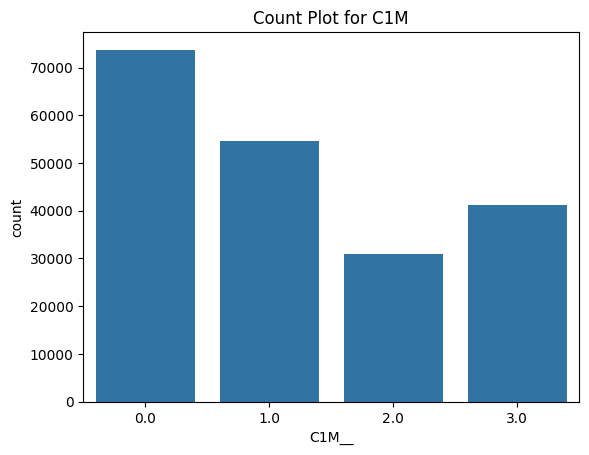

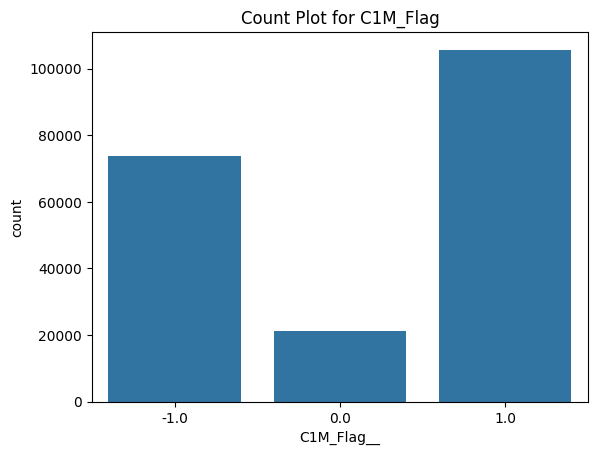

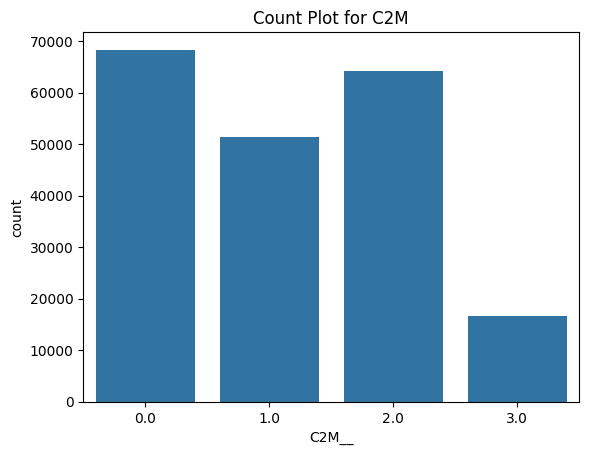

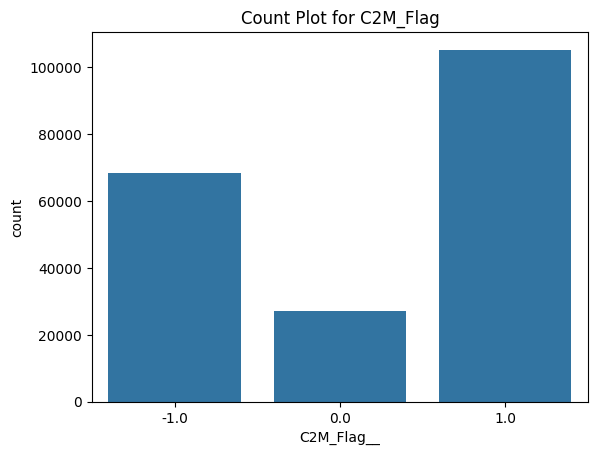

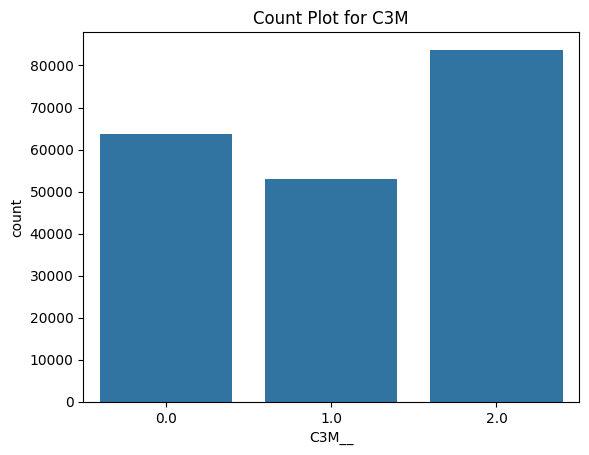

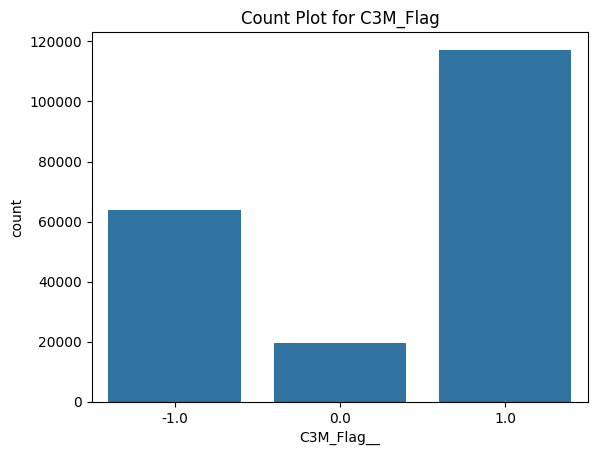

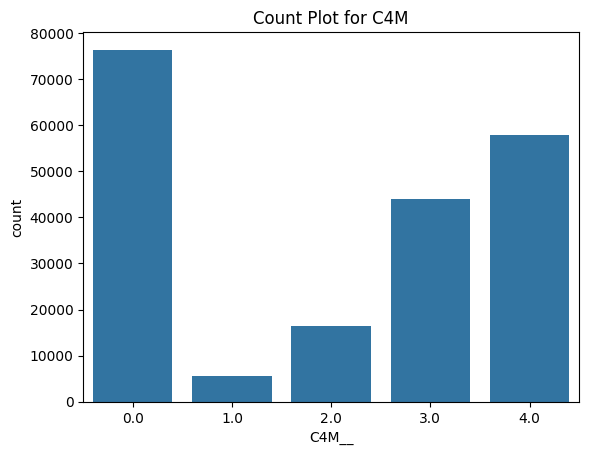

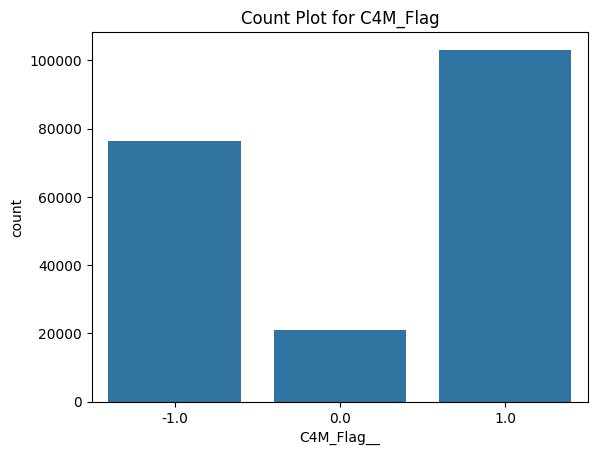

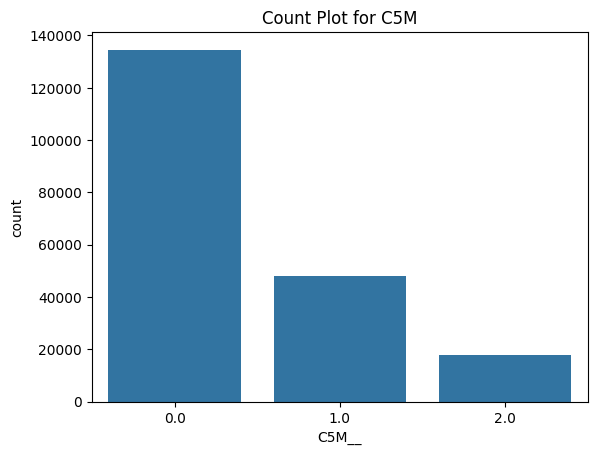

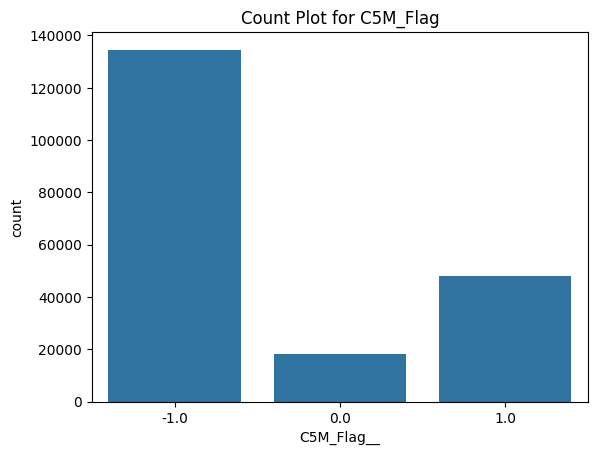

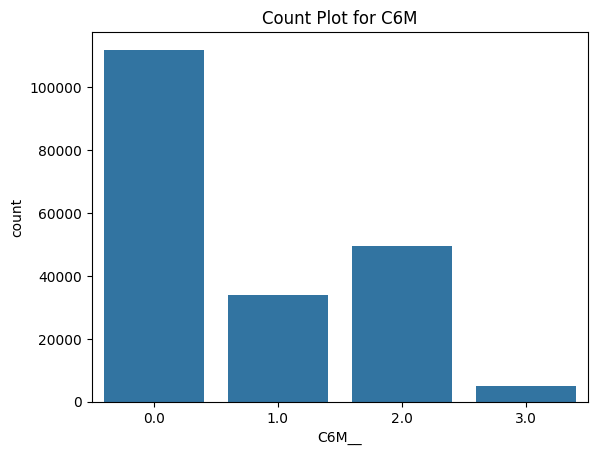

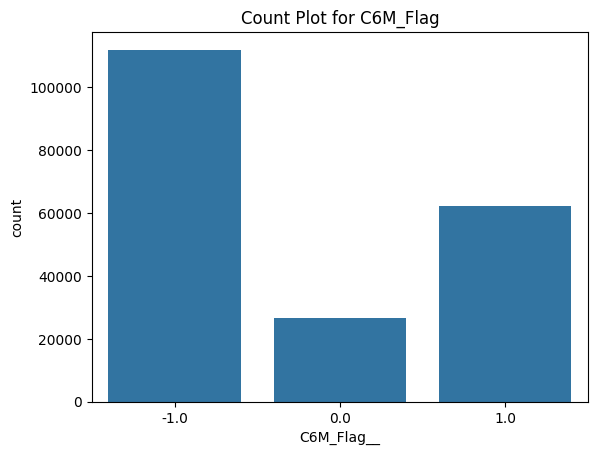

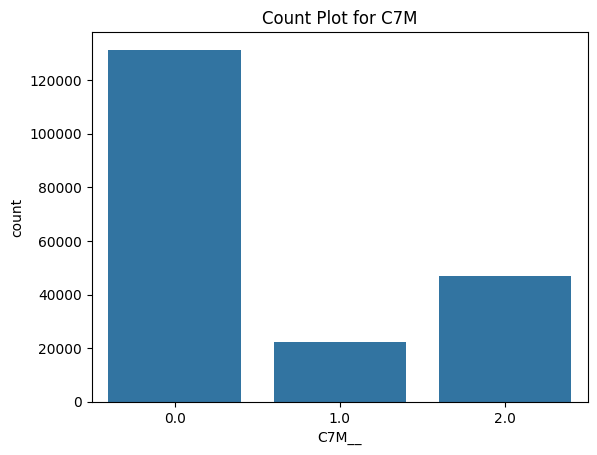

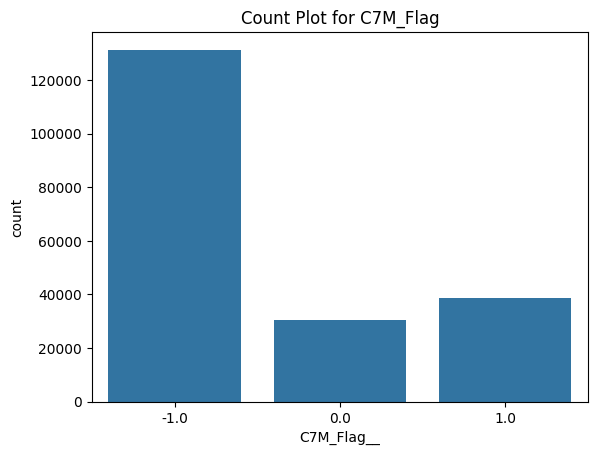

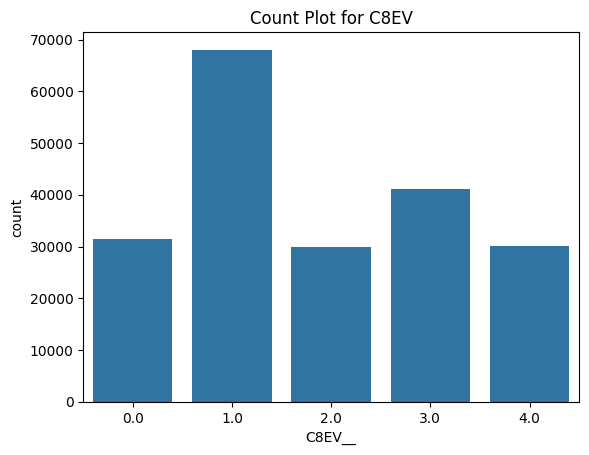

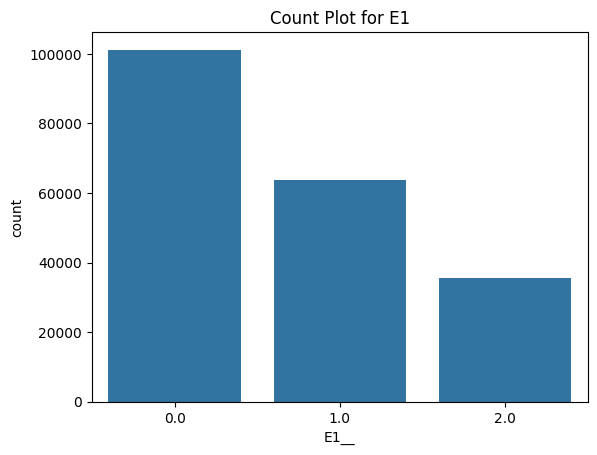

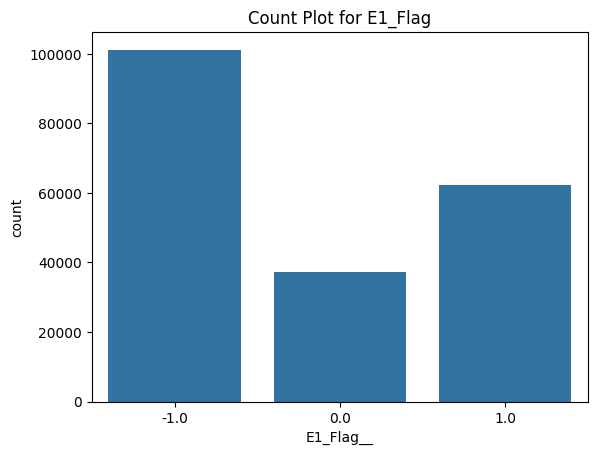

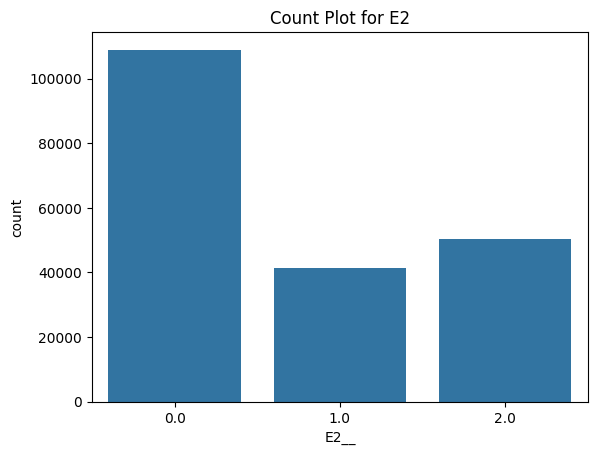

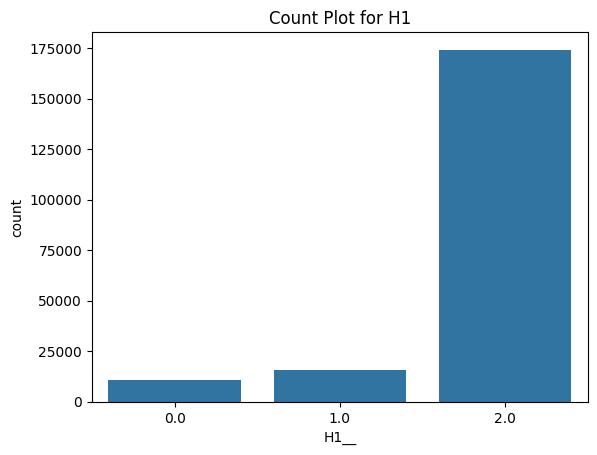

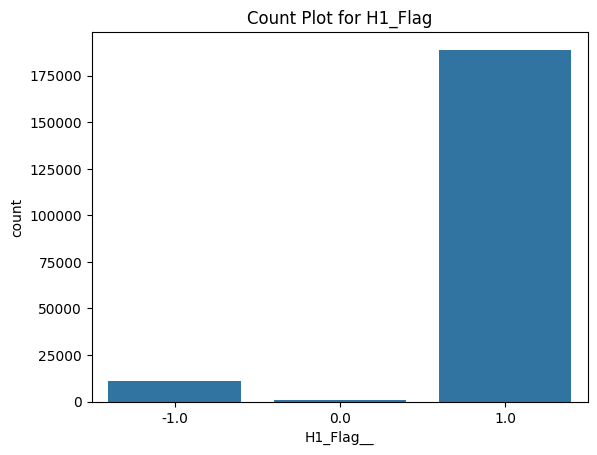

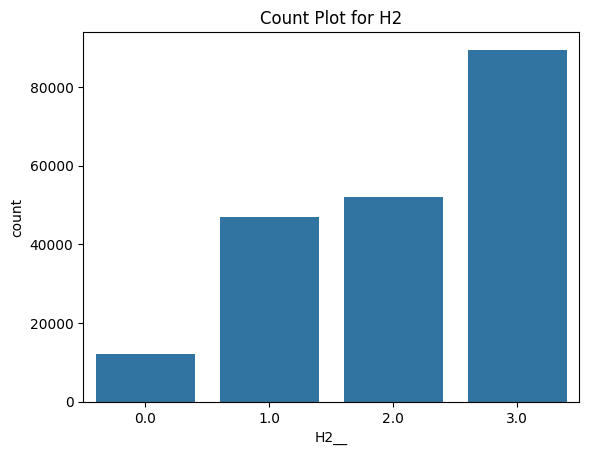

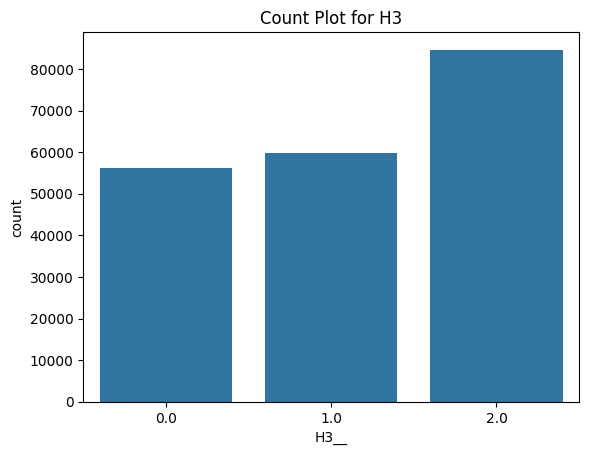

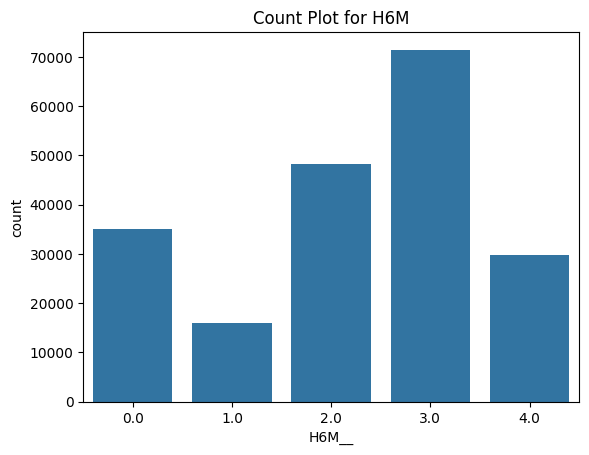

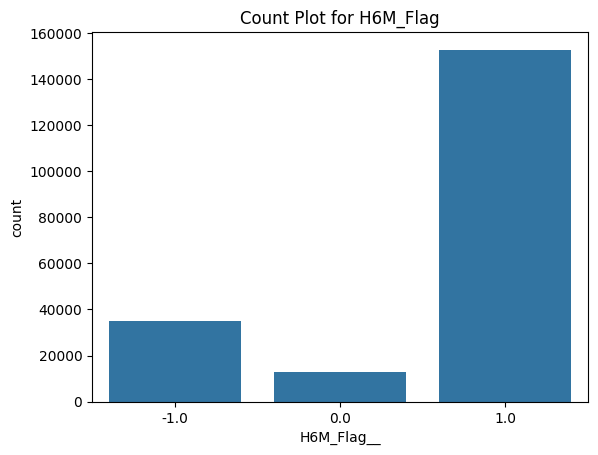

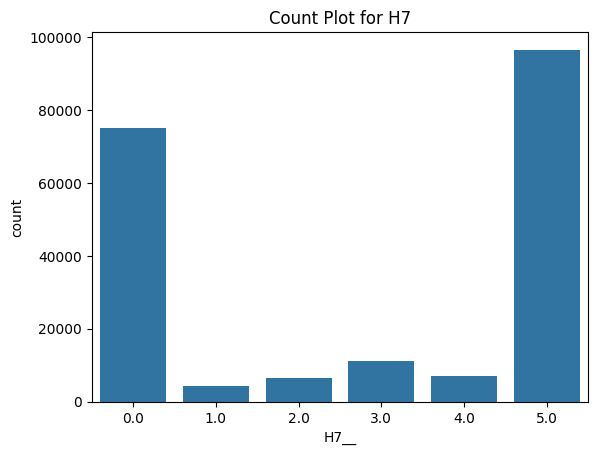

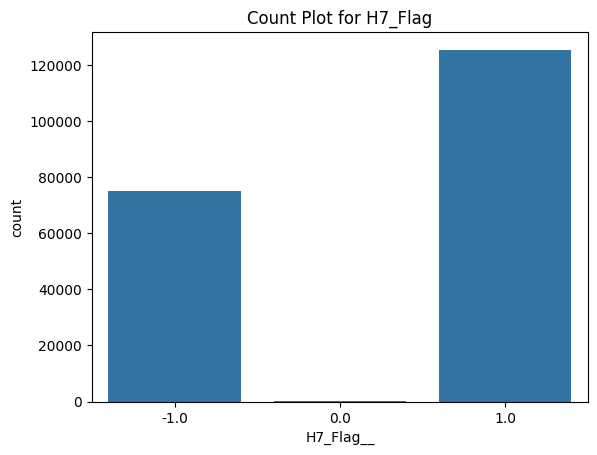

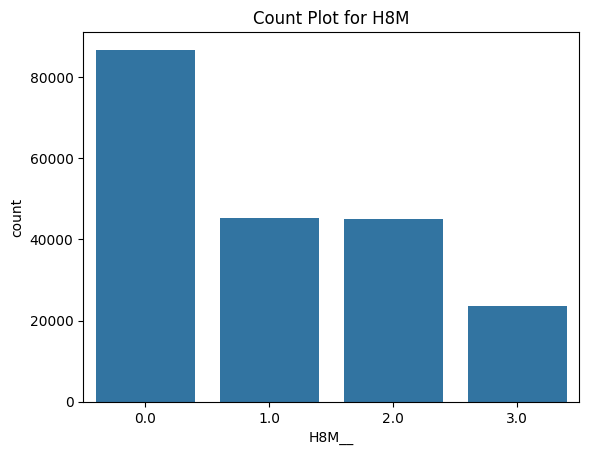

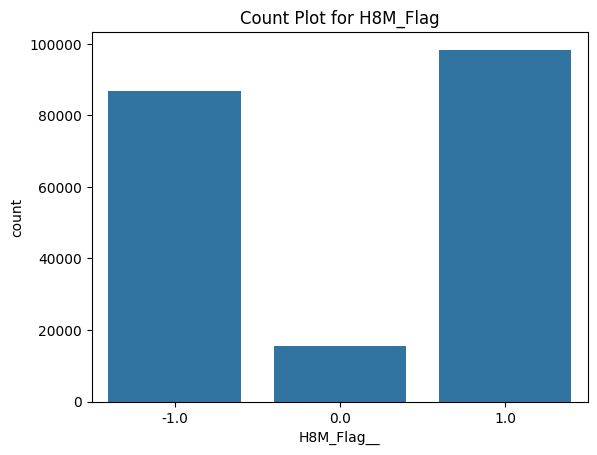

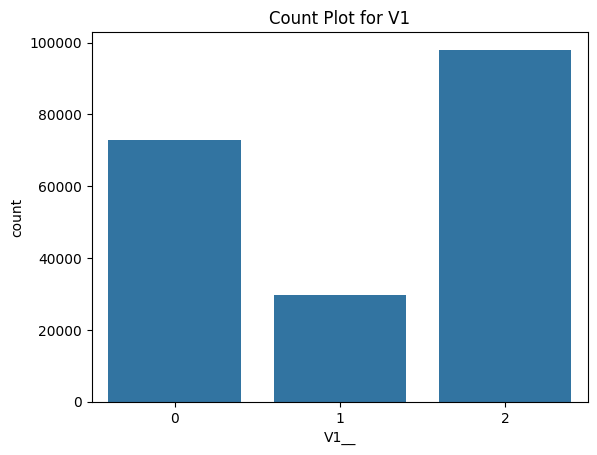

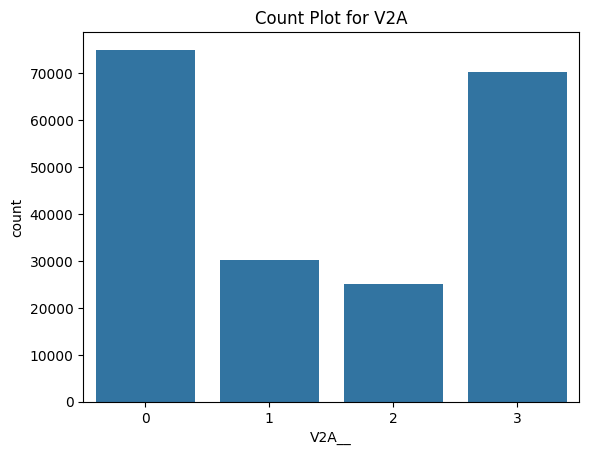

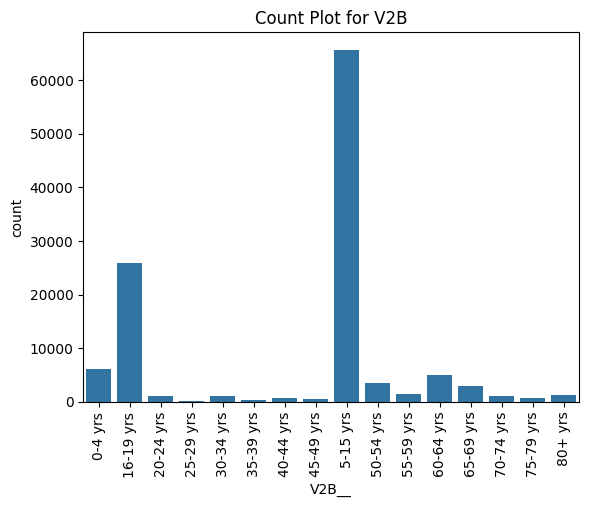

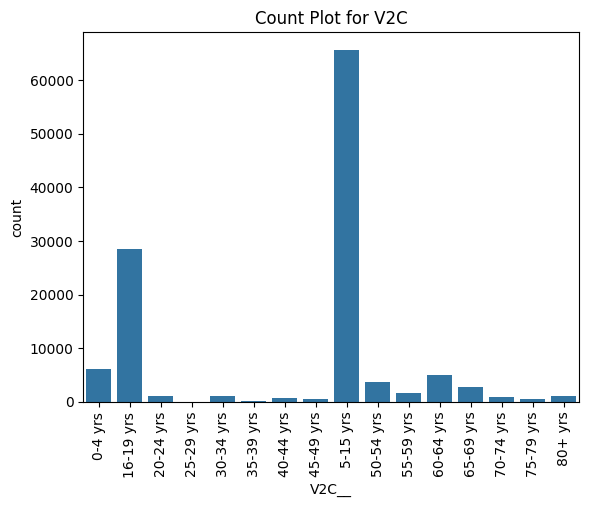

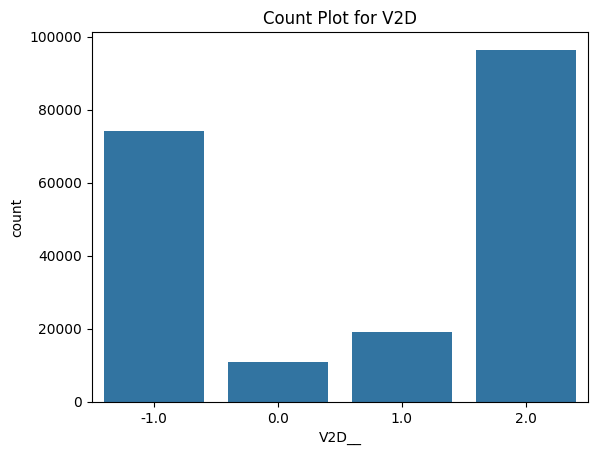

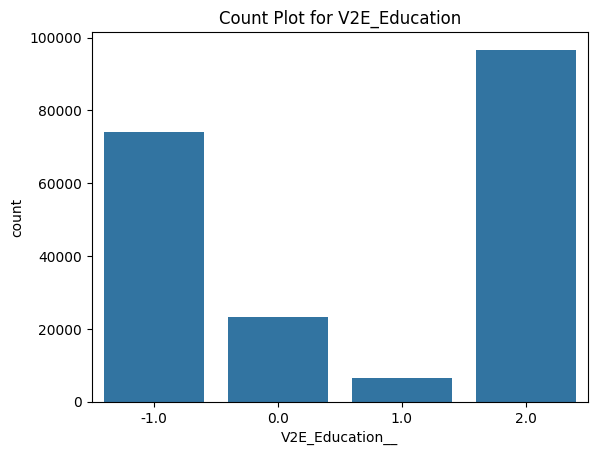

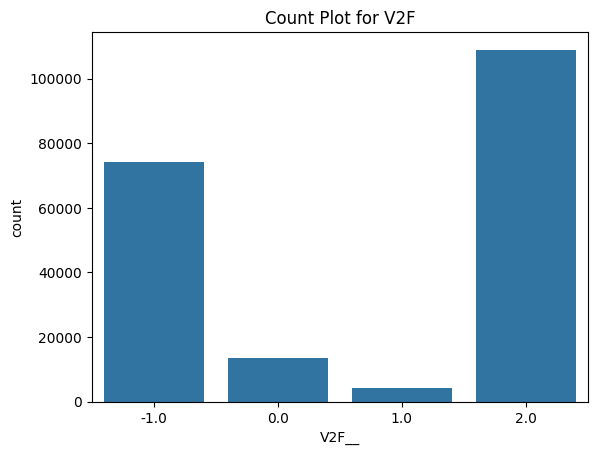

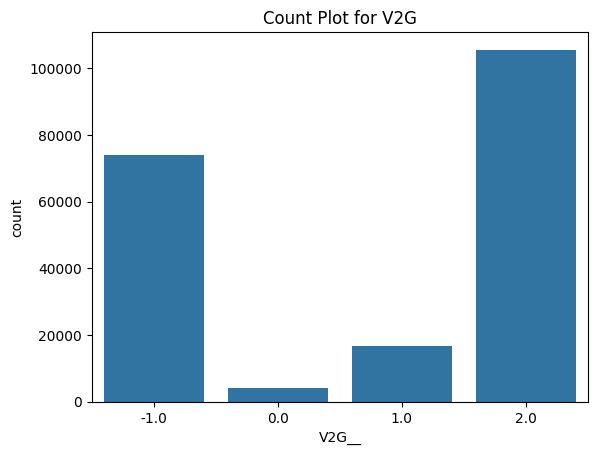

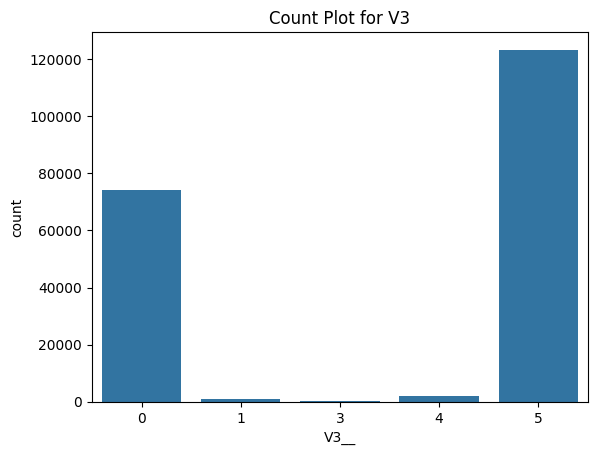

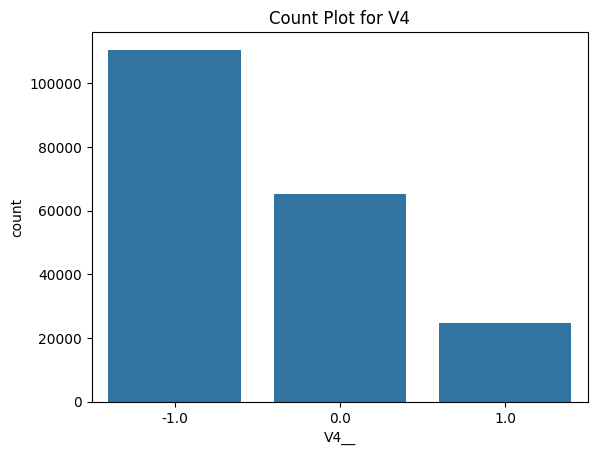

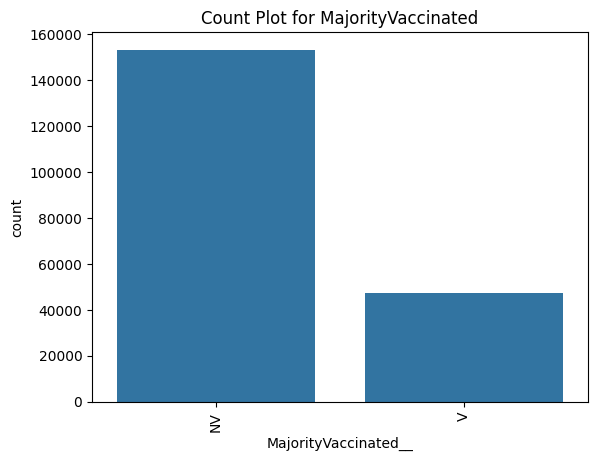

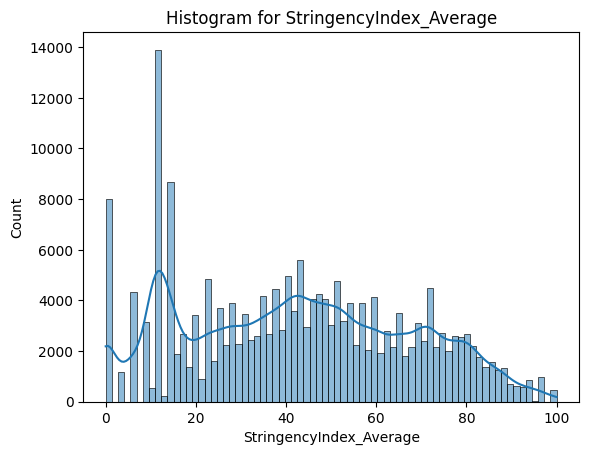

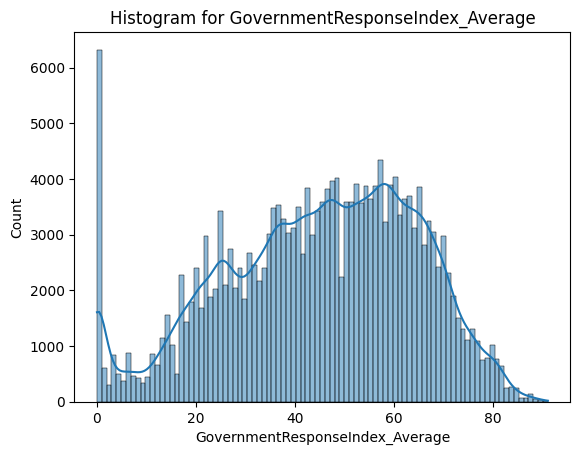

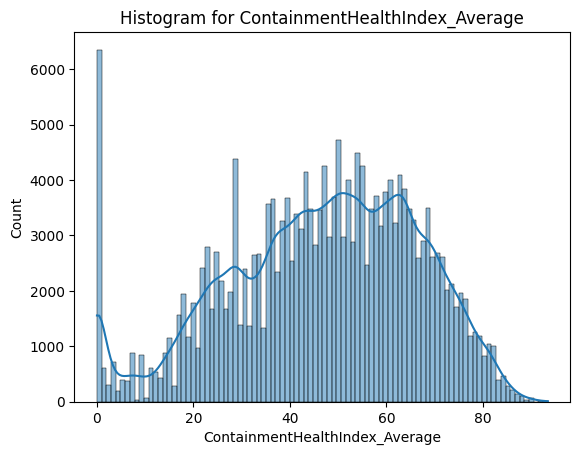

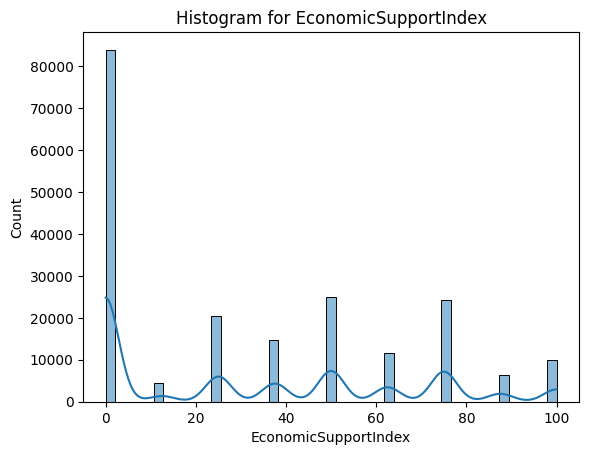

In [158]:
#helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')
def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['BinaryFlag', 'Binary', 'Categorical', 'Ordinal']:
        # Count plot for categorical and binary data
        #df[column + '_temp'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
        if measurement_info == 'Categorical':
            df[column+'__'] = df[column].apply(lambda x: 'Missing' if pd.isnull(x) else x)
            sns.countplot(x=df[column+'__'])
            plt.title(f'Count Plot for {column}')
            plt.xticks(rotation=90)
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        else: 
            df[column+'__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
            sns.countplot(data=df, x=column + '__')
            plt.title(f'Count Plot for {column}')
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        #fig = go.Figure(data=go.Histogram(x=df[column]))
        #fig.update_layout(title_text=f'Count Plot for {column}', xaxis_title=column, yaxis_title='Count')
        #fig.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        df[column+'__'] = df[column].apply(lambda x: -99 if pd.isnull(x) else x)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()
        df.drop(column+'__', axis=1, inplace=True)

exclude_columns = ['Date', 'CountryName', 'ConfirmedCases', 'ConfirmedDeaths', 'PopulationVaccinated', 'E3', 'E4', 'H4', 'H5']
columns_to_plot = [col for col in df.columns if col not in exclude_columns]


for column in columns_to_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement_2'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])

#### Considering nationwide policies only

In [ ]:
# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape

In [ ]:
df.describe()

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.

In [ ]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

#### Fill NaNs with 0.

In [ ]:
'''
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')
'''        

### Correlation Matrix

In [ ]:
corr_matrix = df.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [ ]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

### TSA

In [ ]:
# Aggregating data by date
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

# Plotting ConfirmedCases and ConfirmedDeaths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedCases'], label='Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedDeaths'], label='Confirmed Deaths', color='red')
plt.title('Trend of Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print('The total number of covid-19 cases in our dataset are {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

In [ ]:
df_agg_date.describe()

In [ ]:
df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
df_monthly.head(25)
#df_monthly.tail(25)

In [ ]:
containment_policy_columns = ['C1M', 'C2M', 'C3M',
                  'C4M', 'C5M',
                  'C6M', 'C7M',
                  'C8EV']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(containment_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [ ]:
health_policy_columns = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H7', 'H8M']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(health_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')



custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





In [ ]:
economic_policy_columns = ['E1','E2', 'E3', 'E4']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(economic_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df_monthly.head(1)

In [ ]:
vaccination_policy_columns = ['V1', 'V2A', 'V2B','V2C','V2D', 'V2E_Education','V2F', 'V2G', 'V3', 'V4']
fig, axes = plt.subplots(nrows=len(vaccination_policy_columns), ncols=1, figsize=(10, 40), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(vaccination_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

### EDA 2

In [ ]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)


df2['policy_c'] = df2[containment_policy_columns].sum(axis=1)
df2['policy_e'] = df2[economic_policy_columns].sum(axis=1)
df2['policy_h'] = df2[health_policy_columns].sum(axis=1)
df2['policy_v'] = df2[vaccination_policy_columns].sum(axis=1)

world = world.merge(df2, left_on='iso_a3', right_on='CountryCode')

policy_dict = {
    'c': ['policy_c', 'Containment and closure policies'],
    'e': ['policy_e', 'Economic policies'],
    'h': ['policy_h', 'Health system policies'],
    'v': ['policy_v', 'Vaccination policies']
}

for key, value in policy_dict.items():
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
  world.plot(column = policy_dict[key][0], cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
  ax.set_title(f'{policy_dict[key][1]} Implemented Globally')
  plt.show()


In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(7, 20))

world.plot(column='StringencyIndex_Average', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Stringency Index')

world.plot(column='GovernmentResponseIndex_Average', cmap='Oranges', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)
axs[1].set_title('Government Response Index')

world.plot(column='ContainmentHealthIndex_Average', cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.8', legend=True)
axs[2].set_title('Containment Health Index')

world.plot(column='EconomicSupportIndex', cmap='Purples', linewidth=0.8, ax=axs[3], edgecolor='0.8', legend=True)
axs[3].set_title('Economic Support Index')

plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='E1_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Economic support provided for formal and informal sectors (in red otherwise blue)')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='H7_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Vaccines Sold to individuals at minimum or no cost (red)')
plt.show()